## Main Goal
Building a personalized dating recommendation system to facilitate meaningful connections!

### Data Understanding
The dataset consists of the following columns:

1. **User ID**: A unique identifier for each user.
2. **Age**: The age of the user.
3. **Gender**: The gender of the user (e.g., Male, Female).
4. **Height**: The height of the user.
5. **Interests**: A list of interests or hobbies expressed by the user.
6. **Looking For**: The user’s dating preferences, such as “Long-term Relationship,” “Marriage,” etc.
7. **Children**: Indicates whether the user has children (“Yes,” “No,” “Maybe”).
8. **Education Level**: The user’s highest education level.
9. **Occupation**: The user’s current occupation.
10. **Swiping History**: A numerical score representing the user’s interactions (e.g., likes/dislikes) with other profiles.
11. **Frequency of Usage**: How often the user engages with the dating app (e.g., “Daily,” “Monthly”).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
dataset = pd.read_csv("datasets/dating_app_dataset.csv")

In [5]:
dataset.head()

,User ID,Age,Gender,Height,Interests,Looking For,Children,Education Level,Occupation,Swiping History,Frequency of Usage
0,1,30,Male,5.240385,"['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...",Casual Dating,No,High School,Student,96,Weekly
1,2,27,Female,4.937625,"['Sports', 'Reading']",Friendship,Yes,Master's Degree,Artist,96,Monthly
2,3,29,Female,5.806296,['Sports'],Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily
3,4,29,Female,5.101402,['Reading'],Marriage,No,Ph.D.,Doctor,67,Daily
4,5,32,Male,5.986670,"['Sports', 'Hiking', 'Music', 'Movies', 'Readi...",Long-term Relationship,Yes,Ph.D.,Engineer,93,Monthly


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User ID             500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   Gender              500 non-null    object 
 3   Height              500 non-null    float64
 4   Interests           500 non-null    object 
 5   Looking For         500 non-null    object 
 6   Children            500 non-null    object 
 7   Education Level     500 non-null    object 
 8   Occupation          500 non-null    object 
 9   Swiping History     500 non-null    int64  
 10  Frequency of Usage  500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [7]:
dataset.isnull().sum()

User ID               0
Age                   0
Gender                0
Height                0
Interests             0
Looking For           0
Children              0
Education Level       0
Occupation            0
Swiping History       0
Frequency of Usage    0
dtype: int64

### Exploratory Data Analysis
#### What is the age distribution of users, and are there any outliers in age?

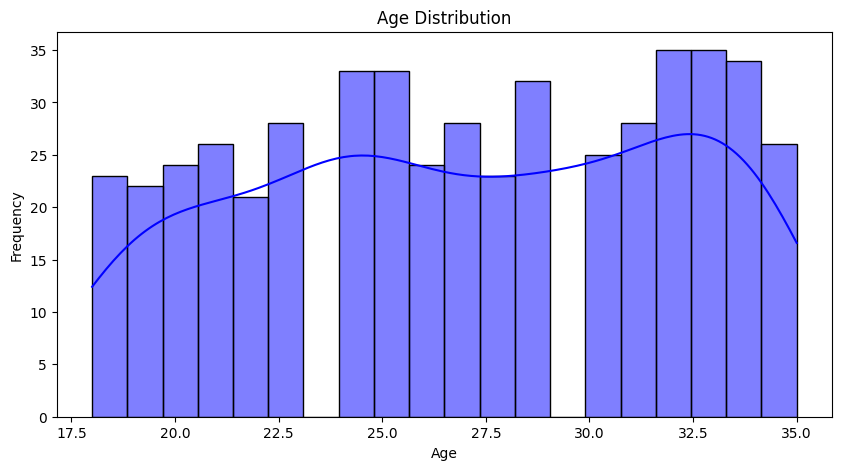

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(dataset['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

> The age range of users is from 17.5 to 35 years old. The data is divided into three major groups: 18-23, 24-29, and 30-35 years old. The distribution is not perfectly normal or uniform but leans towards uniformity, with slightly more users in the 24-29 and 30-35 age ranges.  
> The age distribution indicates a relatively even spread of users across different age groups, particularly between 24 and 35 years old. This could imply that the app attracts a diverse age range, with a slight preference for users in their mid-20s to early 30s.

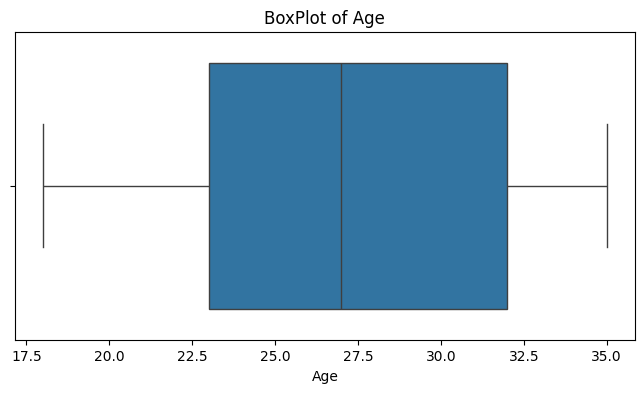

In [9]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=dataset['Age'])
plt.title('BoxPlot of Age')
plt.xlabel('Age')
plt.show()

> No outliers in the 'Age' data.  
The absence of outliers suggests that the ages of users fall within a typical range, with no extreme deviations.

#### How is the gender distribution represented, and how does it relate to other features such as interests?

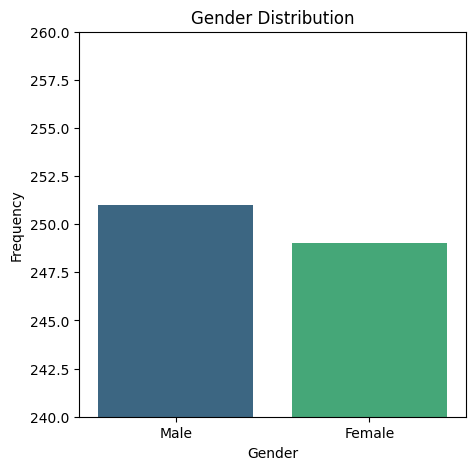

In [10]:
gender_counts = dataset['Gender'].value_counts()

plt.figure(figsize=(5, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.ylim(240, 260)
plt.show()

In [11]:
gender_occupation_counts = dataset.groupby(['Gender', 'Occupation']).size().unstack()

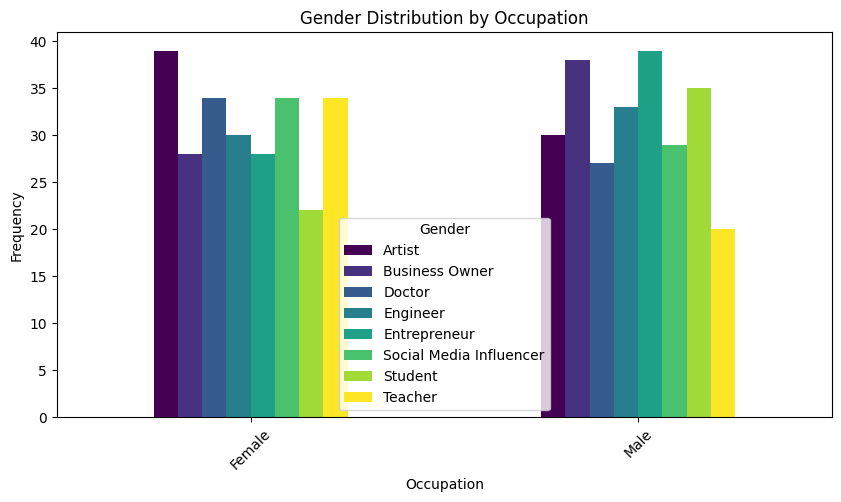

In [12]:
gender_occupation_counts.plot(kind='bar', figsize=(10, 5), colormap='viridis')
plt.title('Gender Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

> **Females** have more Teachers, slightly more Social Media Influencers, more Doctors, and more Artists!  
**Males** have more Students, more Entrepreneurs, more Engineers, and more Business Owners!  

> These insights could inform personalized recommendations and matchmaking, helping to match users with complementary interests and lifestyles.

#### What is the distribution of user heights, and does height show any correlation with age?

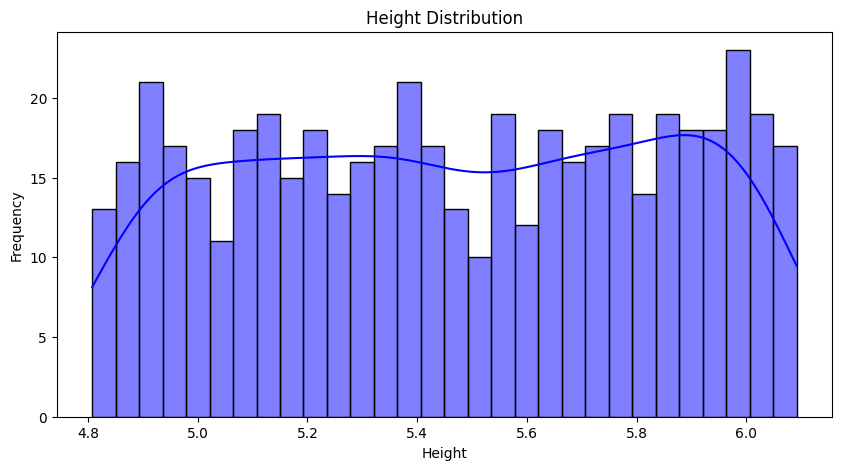

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(dataset['Height'], bins=30, kde=True, color='blue')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

> The histogram shows the distribution of user heights is almost uniform!

In [14]:
# Calculating the correlation between height and age
correlation = dataset['Height'].corr(dataset['Age'])
print(f'Correlation between Height and Age: {correlation}')

Correlation between Height and Age: 0.054754032785688966


#### Which interests or hobbies are most common among users?

In [15]:
from collections import defaultdict
# Creating a dictionary to store the count of each interest
interests_count_dict = defaultdict(int)

In [16]:
# Preprocess the 'Interests' feature
def preprocess_interests(interest_str):
    interest_str = interest_str.replace("[", "")
    interest_str = interest_str.replace("]", "")
    interest_str = interest_str.replace("'", "")
    interest_str = interest_str.replace(" ", "")
    interest_str = interest_str.split(',')
    return interest_str

In [17]:
# Apply preprocessing to the 'Interests' column
dataset['Interests'] = dataset['Interests'].apply(preprocess_interests)

In [18]:
# Iterating through the interests columns and counting the frequency of each interest
for interests in dataset['Interests']:
    for tempHobby in interests:
        interests_count_dict[tempHobby] += 1

In [19]:
# Convert the dictionary to a DataFrame For better visualization
interest_count_df = pd.DataFrame(interests_count_dict.items(), columns=['Interest', 'Count'])
# Sorting the DataFrame By Count in Descending Order
interest_count_df = interest_count_df.sort_values(by='Count', ascending=False)

In [20]:
for hobby in interest_count_df['Interest']:
    print(f'{hobby}: {interests_count_dict[hobby]}')

Travel: 315
Music: 293
Sports: 292
Cooking: 291
Reading: 289
Hiking: 286
Movies: 279


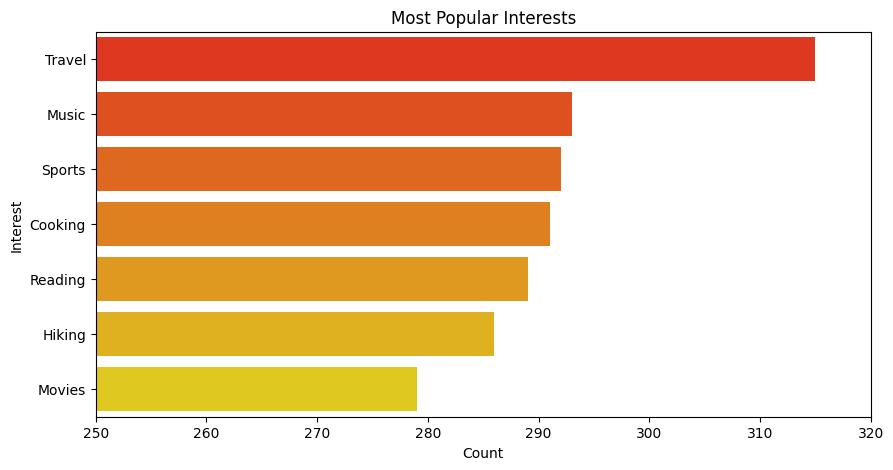

In [21]:
# Bar Chart for the most popular interests
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Interest', data=interest_count_df, hue='Interest', palette='autumn')
plt.title('Most Popular Interests')
plt.xlabel('Count')
plt.ylabel('Interest')
plt.xlim(250, 320)
plt.show()

> **Most Popular Hobby**: Travel.  
Other Common Hobbies: Cooking, Hiking, Music, Reading.  
Moderately Popular Hobby: Movies.  
Users are highly engaged in activities that involve exploration, creativity, and personal growth.

#### What is the distribution of “Looking For” preferences, and do these preferences vary across different demographic segments?

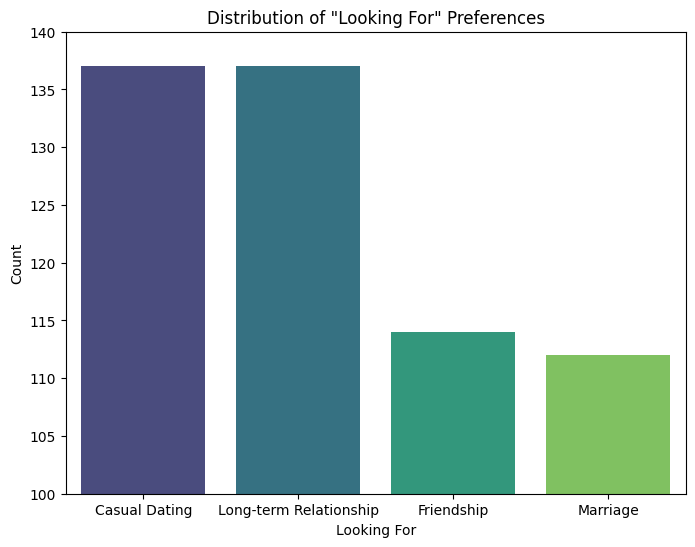

In [22]:
# Count the number of users in each "Looking For" category
looking_for_counts = dataset['Looking For'].value_counts()

# Bar chart for "Looking For" distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=looking_for_counts.index, y=looking_for_counts.values, hue=looking_for_counts.index, palette='viridis')
plt.title('Distribution of "Looking For" Preferences')
plt.xlabel('Looking For')
plt.ylabel('Count')
plt.ylim(100, 140)
plt.show()


> Most users have 'Casual Dating', 'Long-term Relationship' as preferences, followed by 'Friendship', and then 'Marriage'!

In [23]:
# Grouping by 'Looking For' and 'Gender'
looking_for_gender_counts = dataset.groupby(['Looking For', 'Gender']).size().unstack()

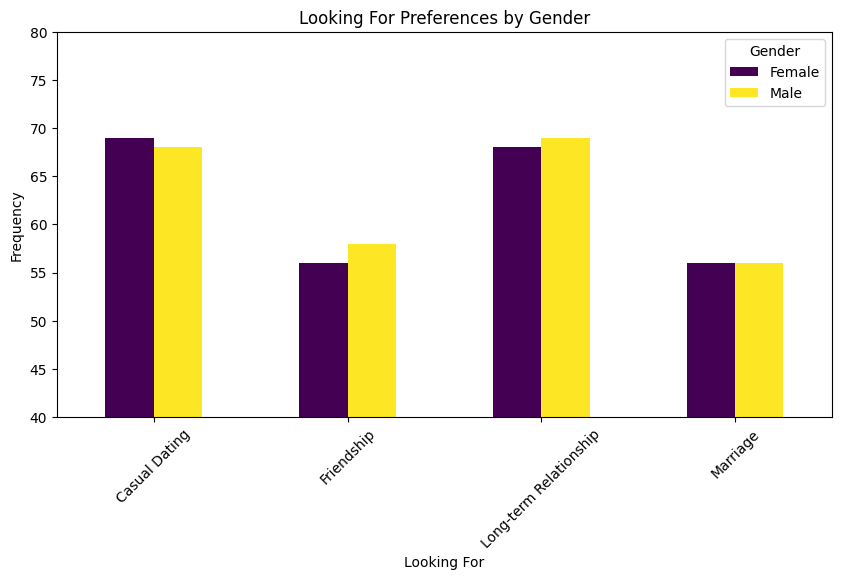

In [24]:
# Grouped bar chart for 'Looking For preferences by Gender
looking_for_gender_counts.plot(kind='bar', figsize=(10, 5), colormap='viridis')
plt.title('Looking For Preferences by Gender')
plt.xlabel('Looking For')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.ylim(40, 80)
plt.show()

> **Casual Dating**: Slightly more female users.  
**Friendship**: Slightly more male users.  
**Long-Term Relationship**: Slightly more male users.  
**Marriage**: Equal preference among both genders.  
**Preference Trends**: Females tend to prefer casual dating slightly more, while males show a slight preference for friendships and long-term relationships.

#### How do users’ responses to the “Children” feature distribute, and is there any relationship with education level, or dating preferences?

In [25]:
# Count the number of users in each 'Children' category
children_counts = dataset['Children'].value_counts()

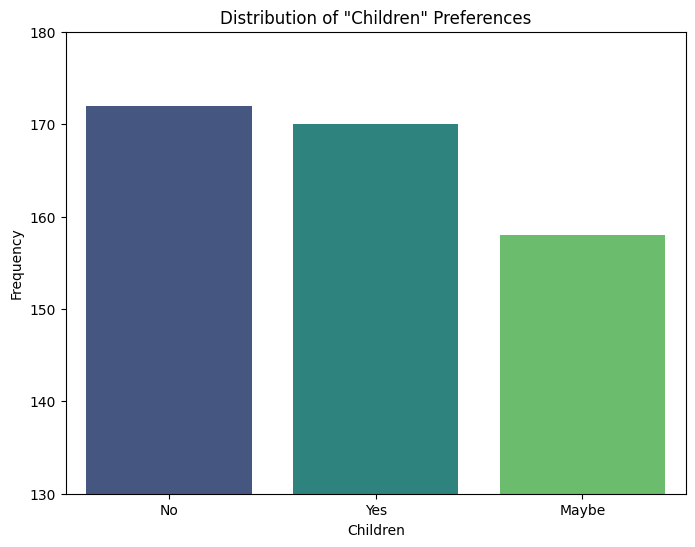

In [26]:
# Bar chart for 'Children' distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=children_counts.index, y=children_counts.values, hue=children_counts.index, palette='viridis')
plt.title('Distribution of "Children" Preferences')
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.ylim(130, 180)
plt.show()

> There are slightly more users that don't want 'No' children, than 'Yes' or want/have children! There are also user 155 users (MAYBE) that are unsure about whether they want children or not!

In [27]:
children_educaton_counts = dataset.groupby(['Children', 'Education Level']).size().unstack()

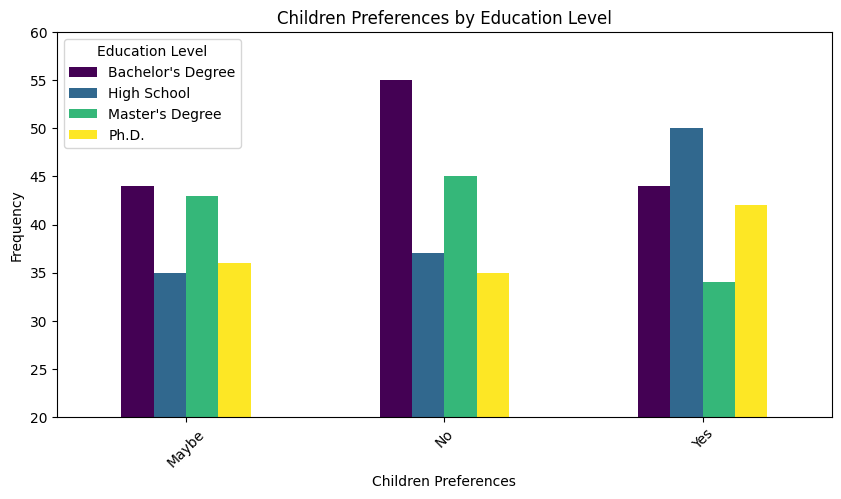

In [28]:
children_educaton_counts.plot(kind='bar', figsize=(10, 5), colormap='viridis')
plt.title('Children Preferences by Education Level')
plt.xlabel('Children Preferences')
plt.ylabel('Frequency')
plt.legend(title='Education Level')
plt.xticks(rotation=45)
plt.ylim(20, 60)
plt.show()

> **Maybe Group**: Highest in Bachelor's and Master's Degrees.  
**No Group**: Highest in Bachelor's Degree, followed by Master's Degree, High School, and Ph.D.  
**Yes Group**: Highest in High School, followed by Bachelor's Degree, Ph.D., and lowest in Master's Degree.  

> Users with higher education levels (Bachelor's and Master's) are more uncertain about having children.  
Users with Bachelor's Degrees have the highest representation in both the 'No' and 'Maybe' groups, indicating a diverse range of views on having children.  
Users with High School education are most likely to want children, suggesting differing priorities or life stages compared to those with higher education levels.  

> 

In [29]:
children_looking_for_counts = dataset.groupby(['Children', 'Looking For']).size().unstack()

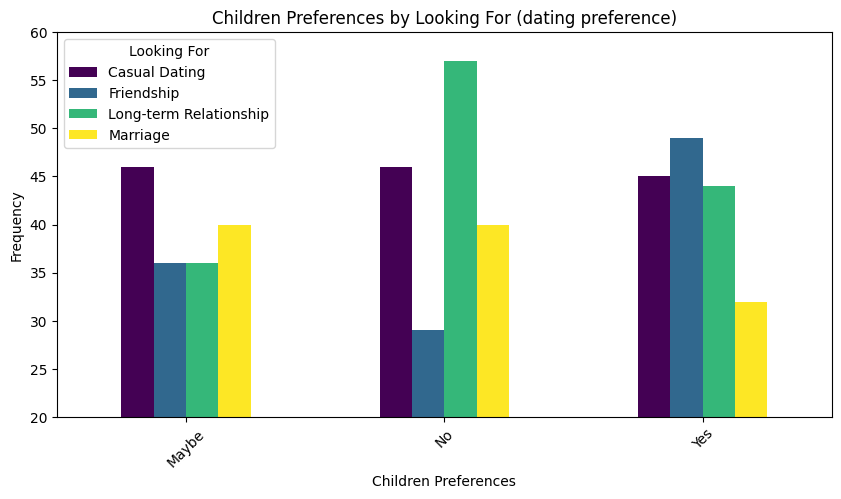

In [30]:
children_looking_for_counts.plot(kind='bar', figsize=(10, 5), colormap='viridis')
plt.title('Children Preferences by Looking For (dating preference)')
plt.xlabel('Children Preferences')
plt.ylabel('Frequency')
plt.legend(title='Looking For')
plt.xticks(rotation=45)
plt.ylim(20, 60)
plt.show()

> **Maybe Group**: Users with 'Casual Dating' preferences are the highest, followed by 'Marriage'.  
**No Group**: Users with 'Long-Term Relationship' preferences are the highest, followed by 'Friendship,' 'Marriage,' and then 'Casual Dating'.  
**Yes Group**: Users with 'Friendship' preferences are the highest, followed by 'Casual Dating,' 'Long-Term Relationship,' and 'Marriage'.  

> Users preferring 'Long-Term Relationships' are more likely to not want children, whereas users looking for 'Friendship' are least likely to not want children.  
Users preferring 'Friendship' are most likely to want children, suggesting that these users may value family-oriented connections.  

#### What patterns emerge from the distribution of education levels and occupations?

In [31]:
education_counts = dataset['Education Level'].value_counts()

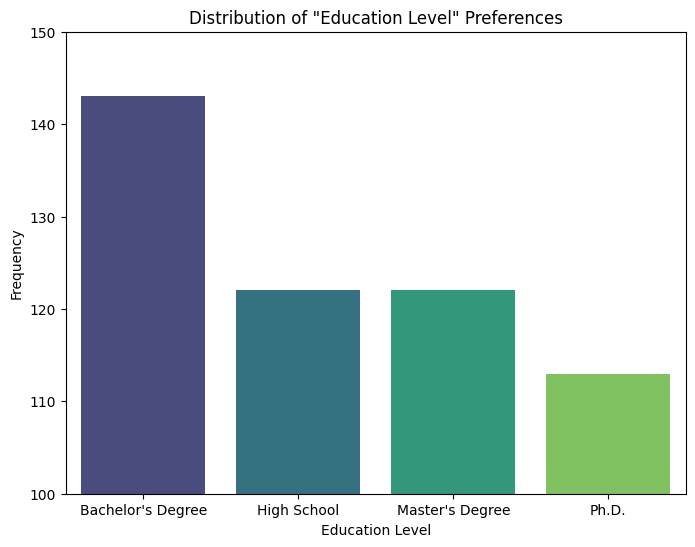

In [32]:
# Bar chart for 'Education Level' distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, hue=education_counts.index, palette='viridis')
plt.title('Distribution of "Education Level" Preferences')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.ylim(100, 150)
plt.show()

> There are 140 users with Bachelor's Degree! There are 120 users with High School and Master's Degree and There are 118 users with Ph.D degree!

In [33]:
# Count the number of users in each Occupation group
occupation_counts = dataset['Occupation'].value_counts()

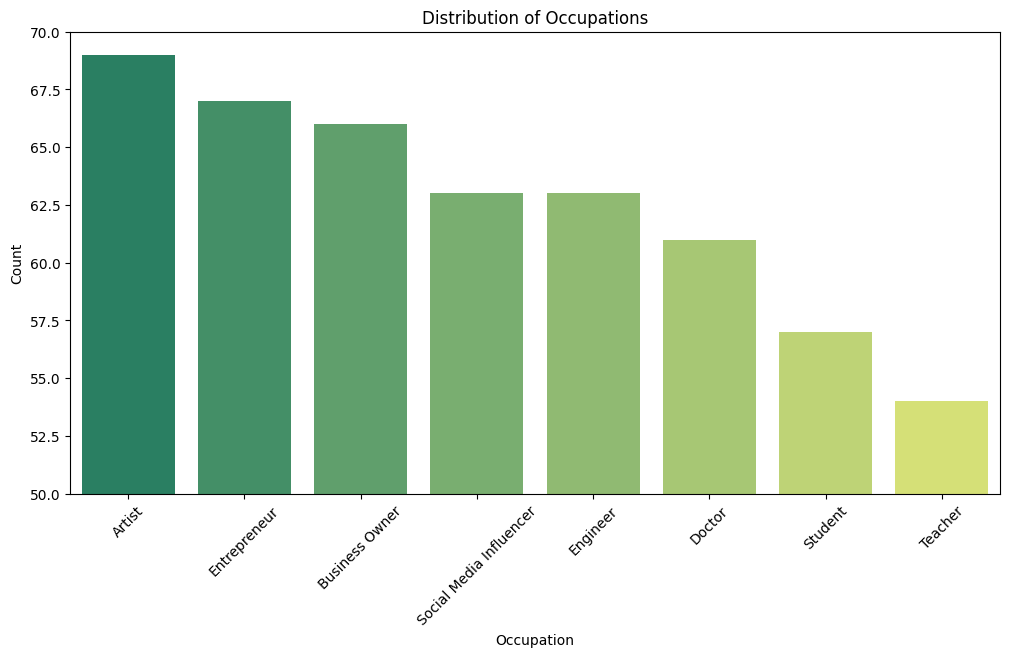

In [34]:
# Bar chart for Occupation distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, hue=occupation_counts.index, palette='summer')
plt.title('Distribution of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(50, 70)
plt.show()

> The most users are artists and the least occupation groups are teacher and student!

#### How does the swiping history metric behave across users, and are there any significant trends?

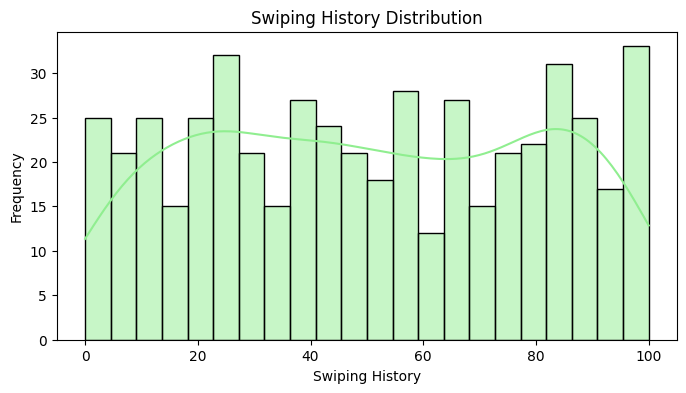

In [35]:
# Historgram for distribution of Swiping History
plt.figure(figsize=(8, 4))
sns.histplot(dataset['Swiping History'], bins=int(np.sqrt(dataset.shape[0])), kde=True, color="lightgreen")
plt.title('Swiping History Distribution')
plt.xlabel('Swiping History')
plt.ylabel('Frequency')
plt.show()

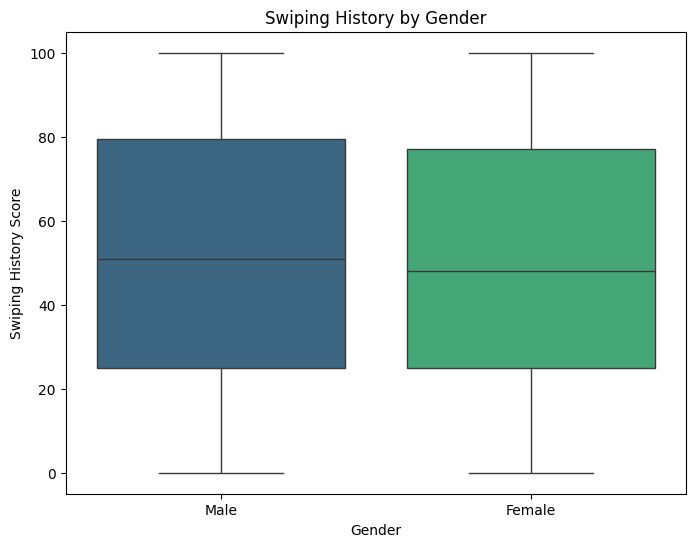

In [36]:
# Box plot for Swiping History by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['Gender'], y=dataset['Swiping History'], hue=dataset['Gender'], palette='viridis')
plt.title('Swiping History by Gender')
plt.xlabel('Gender')
plt.ylabel('Swiping History Score')
plt.show()

> The average swiping history for male is very slightly higher than the female!

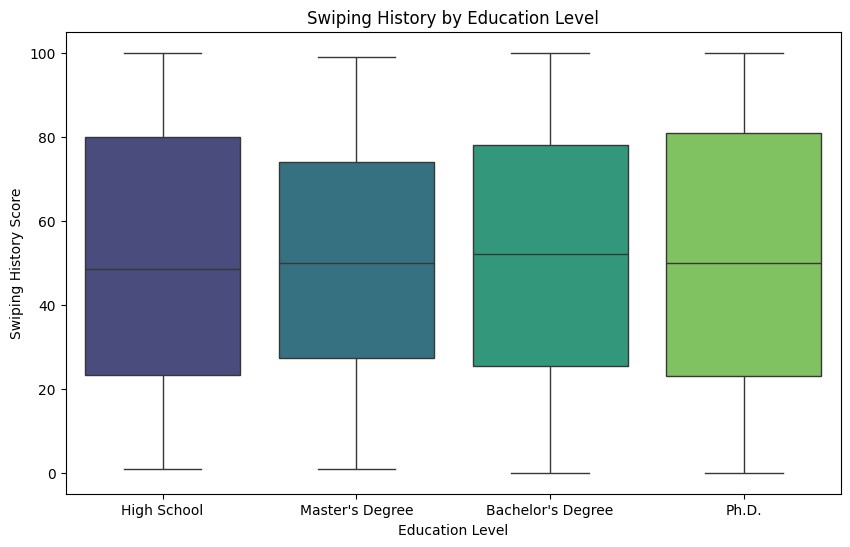

In [37]:
# Box plot for Swiping History by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['Education Level'], y=dataset['Swiping History'], hue=dataset['Education Level'], palette='viridis')
plt.title('Swiping History by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Swiping History Score')
plt.show()

> **Same Mean/Average**: All education levels have the same average swiping history score.  
**Box Size**: Master's degree has the smallest box **(least variation)**, followed by Bachelor's. Ph.D. and High School have equally larger boxes **(more variation)**.   
**Similar Median**: The median swiping history score is almost the same for all education levels.

> **Uniform Swiping Behavior**: The average swiping behavior (likes/dislikes) is consistent across different education levels, indicating similar interaction patterns.  
**Variation in Scores**: Users with a Master's degree have less variation in their swiping history, suggesting more consistent behavior. In contrast, users with High School and Ph.D. education levels exhibit greater variability in their swiping activity.  

#### How is the education level distribution by gender?

In [38]:
education_genders = dataset.groupby(['Education Level', 'Gender']).size().unstack()

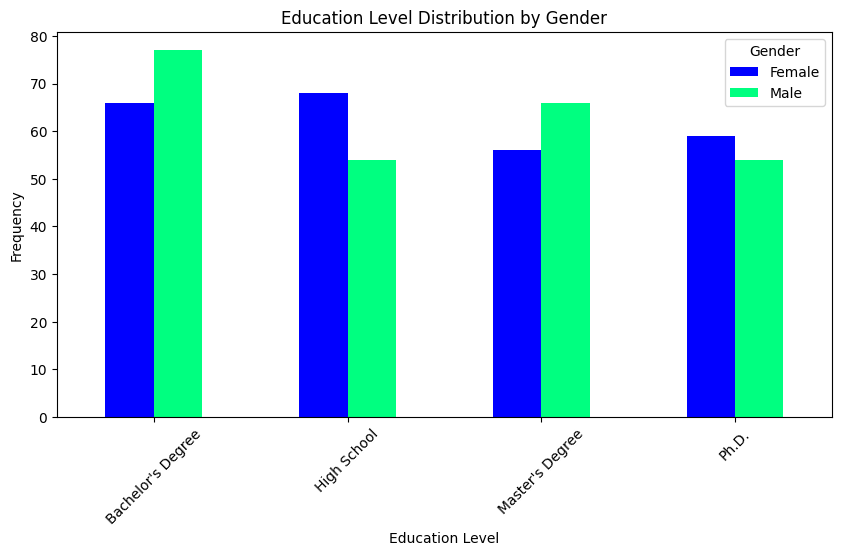

In [39]:
education_genders.plot(kind='bar', figsize=(10, 5), colormap='winter')
plt.title('Education Level Distribution by Gender')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

> There are more male users with Bachelor's Degree and Master's Degree than female users with the corresponding degrees! However there are more female users with High School and Ph.D degrees than male users with the corresponding degrees.

#### How is the app usage distribution by gender?

In [40]:
app_usage_gender = dataset.groupby(['Frequency of Usage', 'Gender']).size().unstack()

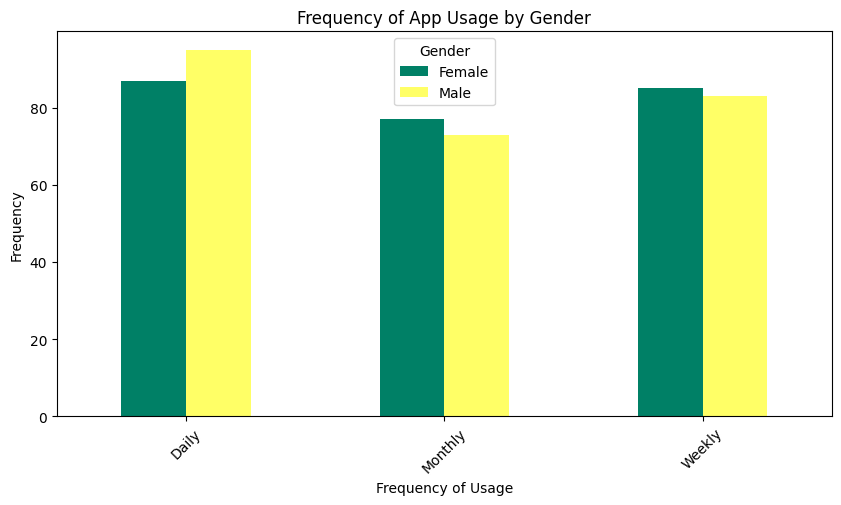

In [41]:
# visualizing the frequency of app usage by gender
app_usage_gender.plot(kind='bar', figsize=(10, 5), colormap='summer')
plt.title('Frequency of App Usage by Gender')
plt.xlabel('Frequency of Usage')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

> Male users are more active on a daily basis than female users. However, female users are slightly more active than male users on a weekly and monthly basis!

### Recommendaton System
> Based on the EDA insights, we are taking **a multifactor “match-score” approach** as a guiding mechanism for user recommendations. 
#### Calculating Match Score

In [53]:
dataset.head()

,User ID,Age,Gender,Height,Interests,Looking For,Children,Education Level,Occupation,Swiping History,Frequency of Usage
0,1,30,Male,5.240385,"[Sports, Cooking, Hiking, Music, Movies, Readi...",Casual Dating,No,High School,Student,96,Weekly
1,2,27,Female,4.937625,"[Sports, Reading]",Friendship,Yes,Master's Degree,Artist,96,Monthly
2,3,29,Female,5.806296,[Sports],Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily
3,4,29,Female,5.101402,[Reading],Marriage,No,Ph.D.,Doctor,67,Daily
4,5,32,Male,5.986670,"[Sports, Hiking, Music, Movies, Reading]",Long-term Relationship,Yes,Ph.D.,Engineer,93,Monthly


In [ ]:
# Calculating a muldifactor Match-Score between two users based on multiple dimensions!
def calculate_match_score(user1, user2):
    # Defining weight for each feature
    weights = {
        "age": 0.2,
        "interests": 0.25,
        "relationship": 0.2,
        "children": 0.15,
        "education_occupation": 0.1,
        "behavior": 0.1
    }

    score = 0.0
    total_weight = sum(weights.values())

    # 1. Age Similarity
    max_age_difference = 10
    age_diff = abs(user1['Age'] - user2['Age'])
    age_score = max(0, 1 - (age_diff / max_age_difference))
    score += age_score * weights['age']

    # 2. Interests Similarity
    # Using Jaccard Similarity
    interests_user1 = set(user1['Interests'])
    interests_user2 = set(user2['Interests'])
    common_interests = len(interests_user1.intersection(interests_user2))
    total_interests = len(interests_user1.union(interests_user2))
    interests_score = common_interests / total_interests if total_interests > 0 else 0
    score += interests_score * weights['interests']

    # 3. Relationship Preferences
    relationship_score = 1 if user1['Looking For'] == user2['Looking For'] else 0
    score += relationship_score * weights['relationship']

    # 4.Children Preferences
    children_score = 1 if user1['Children'] == user2['Children'] else 0
    score += children_score * weights['children']

    # 5. Education and Occupation Similarity
    educ_score = 1 if user1['Education Level'] == user2['Education Level'] else 0
    occup_score = 1 if user1['Occupation'] == user2['Occupation'] else 0
    educ_occup_score = (educ_score + occup_score) / 2
    score += educ_occup_score * weights['education_occupation']

    # 6. Behavior Similarity
    max_swipe_diff = dataset['Swiping History'].max()
    swipe_diff = abs(user1.Swiping_History - user2.Swiping_History)
    swipe_score = max(0, 1 - (swipe_diff / max_swipe_diff))
    # Comparing the frequency of app usage
    frequency_score = 1 if user1['Frequency of Usage'] == user2['Frequency of Usage'] else 0.5
    behavior_score = (swipe_score + frequency_score) / 2
    score += behavior_score * weights['behavior']

    # Calculating the final match score by normalizing with the total weight
    final_match_score = score / total_weight
    return final_match_score